In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('processed_data.xlsx')

In [3]:
df2=pd.read_excel('second_pump.xlsx')

In [4]:
# Convert DateOfCall to datetime
df['DateOfCall'] = pd.to_datetime(df['DateOfCall'], format='%d %b %Y')

# Convert TimeOfCall to datetime.time
df['TimeOfCall'] = pd.to_datetime(df['TimeOfCall']).dt.time

# Convert columns to category data type
df['IncidentGroup'] = df['IncidentGroup'].astype('category')
df['StopCodeDescription'] = df['StopCodeDescription'].astype('category')
df['PropertyCategory'] = df['PropertyCategory'].astype('category')
df['PropertyType'] = df['PropertyType'].astype('category')
df['Postcode_district'] = df['Postcode_district'].astype('category')
df['IncGeo_WardName'] = df['IncGeo_WardName'].astype('category')
df['IncidentStationGround'] = df['IncidentStationGround'].astype('category')
df['FirstPumpArriving_DeployedFromStation'] = df['FirstPumpArriving_DeployedFromStation'].astype('category')

# Print data types
print(df.dtypes)

IncidentNumber                                   object
DateOfCall                               datetime64[ns]
CalYear                                           int64
TimeOfCall                                       object
HourOfCall                                        int64
IncidentGroup                                  category
StopCodeDescription                            category
PropertyCategory                               category
PropertyType                                   category
Postcode_district                              category
IncGeo_WardName                                category
Easting_rounded                                   int64
Northing_rounded                                  int64
IncidentStationGround                          category
FirstPumpArriving_AttendanceTime                float64
FirstPumpArriving_DeployedFromStation          category
NumStationsWithPumpsAttending                   float64
NumPumpsAttending                               

In [5]:
df2['SecondPumpArriving_DeployedFromStation'] = df2['SecondPumpArriving_DeployedFromStation'].astype('category')


In [6]:
# set display option to show all columns
pd.set_option('display.max_columns', None)

In [7]:
df.columns

Index(['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall',
       'IncidentGroup', 'StopCodeDescription', 'PropertyCategory',
       'PropertyType', 'Postcode_district', 'IncGeo_WardName',
       'Easting_rounded', 'Northing_rounded', 'IncidentStationGround',
       'FirstPumpArriving_AttendanceTime',
       'FirstPumpArriving_DeployedFromStation',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'PumpHoursRoundUp', 'Notional Cost (£)', 'NumCalls'],
      dtype='object')

In [8]:
print(df.IncGeo_WardName.nunique())

38


In [9]:
df.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,PropertyCategory,PropertyType,Postcode_district,IncGeo_WardName,Easting_rounded,Northing_rounded,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,000144-01012019,2019-01-01,2019,00:46:36,0,Fire,Secondary Fire,Outdoor Structure,Small refuse/rubbish container,KT9,Hook & Chessington North,518750,164450,Surbiton,326.598483,Surbiton,1.0,1.0,1,1,333,1
1,000152-01012019,2019-01-01,2019,00:51:00,0,Fire,Secondary Fire,Outdoor Structure,Common external bin storage area,KT3,New Malden Village,521150,168150,New Malden,449.000000,Richmond,2.0,2.0,2,1,333,1
2,000304-01012019,2019-01-01,2019,03:13:01,3,False Alarm,False alarm - Good intent,Non Residential,Other car park structure,KT5,King George's & Sunray,519750,165750,Surbiton,182.000000,New Malden,2.0,2.0,2,1,333,1
3,000454-01012019,2019-01-01,2019,13:42:47,13,False Alarm,AFA,Other Residential,Student Hall of Residence,KT1,Norbiton,519150,169150,Kingston,253.000000,Kingston,2.0,3.0,3,1,333,1
4,000500-01012019,2019-01-01,2019,15:57:22,15,False Alarm,False alarm - Good intent,Outdoor Structure,Outdoor storage,KT9,Hook & Chessington North,518850,164250,Surbiton,570.000000,Surbiton,1.0,1.0,1,1,333,1


In [10]:
df2.head()

,IncidentNumber,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation
0,000123-01012019,503,Twickenham
1,000152-01012019,573,Sutton
2,000304-01012019,378,New Malden
3,000454-01012019,257,Kingston
4,001732-04012019,404,New Malden


In [12]:

# Merge the two dataframes on the incident number
merged_df = pd.merge(df, df2, on='IncidentNumber', how='left')

# Filter the dataframe to only incidents with more than one pump attending
merged_df = merged_df[merged_df['NumStationsWithPumpsAttending'] > 1]

# Calculate the difference in seconds between the first and second pump arrival times
merged_df['SecondPumpArrivalDelay'] = (merged_df['SecondPumpArriving_AttendanceTime'] - merged_df['FirstPumpArriving_AttendanceTime']).fillna(0)

# Group the dataframe by ward and calculate the mean cost and mean delay for each ward
grouped = merged_df.groupby('IncGeo_WardName').agg({'Notional Cost (£)': 'sum', 'SecondPumpArrivalDelay': 'mean'})

# Filter the groups to only those with a mean delay greater than 0 seconds
grouped = grouped[grouped['SecondPumpArrivalDelay'] > 0]

# Sort the groups by mean delay in ascending order
grouped = grouped.sort_values('SecondPumpArrivalDelay', ascending=True)

# Print the wards where the second pump is usually late along with the total cost spent on that ward
print("Wards where the second pump is usually late:\n")
for index, row in grouped.iterrows():
    print(f"Ward: {index}, Total Cost: £{row['Notional Cost (£)']:.2f}, Mean Delay: {row['SecondPumpArrivalDelay']:.2f} seconds\n")


Wards where the second pump is usually late:

Ward: OLD MALDEN, Total Cost: £728.00, Mean Delay: 17.50 seconds

Ward: CHESSINGTON SOUTH & MALDEN RUSHETT, Total Cost: £728.00, Mean Delay: 57.00 seconds

Ward: NORBITON, Total Cost: £1820.00, Mean Delay: 64.80 seconds

Ward: Norbiton, Total Cost: £17594.00, Mean Delay: 82.69 seconds

Ward: Kingston Town, Total Cost: £49775.00, Mean Delay: 87.09 seconds

Ward: MOTSPUR PARK & OLD MALDEN EAST, Total Cost: £364.00, Mean Delay: 89.00 seconds

Ward: Coombe Hill, Total Cost: £34048.00, Mean Delay: 91.26 seconds

Ward: KINGSTON TOWN, Total Cost: £14560.00, Mean Delay: 98.22 seconds

Ward: TOLWORTH, Total Cost: £2548.00, Mean Delay: 101.43 seconds

Ward: Coombe Vale, Total Cost: £15855.00, Mean Delay: 102.22 seconds

Ward: Chessington South & Malden Rushett, Total Cost: £7649.00, Mean Delay: 102.82 seconds

Ward: Hook & Chessington North, Total Cost: £12034.00, Mean Delay: 105.51 seconds

Ward: COOMBE HILL, Total Cost: £4732.00, Mean Delay: 106.69

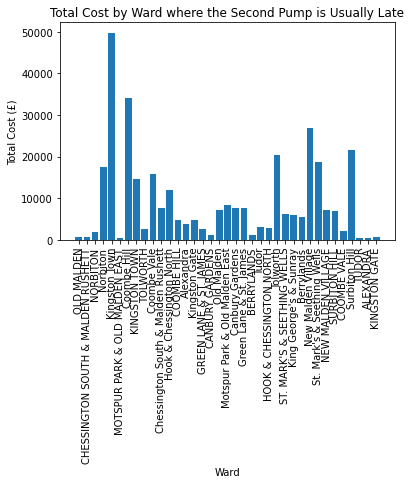

In [13]:
plt.bar(grouped.index, grouped['Notional Cost (£)'])
plt.xticks(rotation=90)
plt.xlabel('Ward')
plt.ylabel('Total Cost (£)')
plt.title('Total Cost by Ward where the Second Pump is Usually Late')
plt.show()

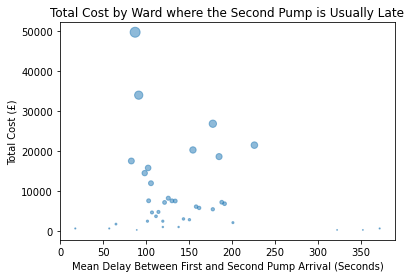

In [14]:
# Plot the results as a scatter plot
plt.scatter(grouped['SecondPumpArrivalDelay'], grouped['Notional Cost (£)'], s=100*grouped['Notional Cost (£)']/grouped['Notional Cost (£)'].max(), alpha=0.5)
plt.xlabel('Mean Delay Between First and Second Pump Arrival (Seconds)')
plt.ylabel('Total Cost (£)')
plt.title('Total Cost by Ward where the Second Pump is Usually Late')
plt.show()

NameError: name 'StandardScaler' is not defined

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


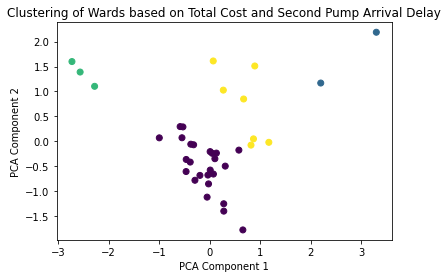

In [17]:


# Merge the two dataframes on the incident number
merged_df = pd.merge(df, df2, on='IncidentNumber', how='left')

# Filter the dataframe to only incidents with more than one pump attending
merged_df = merged_df[merged_df['NumStationsWithPumpsAttending'] > 1]

# Calculate the difference in seconds between the first and second pump arrival times
merged_df['SecondPumpArrivalDelay'] = (merged_df['SecondPumpArriving_AttendanceTime'] - merged_df['FirstPumpArriving_AttendanceTime']).fillna(0)

# Group the dataframe by ward and calculate the mean cost and mean delay for each ward
grouped = merged_df.groupby('IncGeo_WardName').agg({'Notional Cost (£)': 'sum', 'SecondPumpArrivalDelay': 'mean'})

# Filter the groups to only those with a mean delay greater than 0 seconds
grouped = grouped[grouped['SecondPumpArrivalDelay'] > 0]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(grouped)

# Reduce the dimensionality of the data to two components using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Perform clustering using KMeans with 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_data)

# Add the cluster labels to the dataframe
grouped['Cluster'] = kmeans.labels_

# Plot the results
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=grouped['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering of Wards based on Total Cost and Second Pump Arrival Delay')
plt.show()
